In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
from kondo import use_style, use_latex, make_subplots

In [3]:
use_style()

Mostly taken from https://www.kaggle.com/ruchi798/commonlit-readability-prize-eda-baseline?fbclid=IwAR3atGm0km1V8G5HpNI5B-fnRovjGMVwOuK1dZJOX7nH78tDJPTE27Bj45M which is great for learning customization!

In [4]:
x = np.linspace(-3, 3)
coefs = [1, 2, 3, 4]
y = [np.sin(c*x) for c in coefs]

# Basic plot from your matplotlibrc with LaTeX

<Figure size 800x400 with 1 Axes>

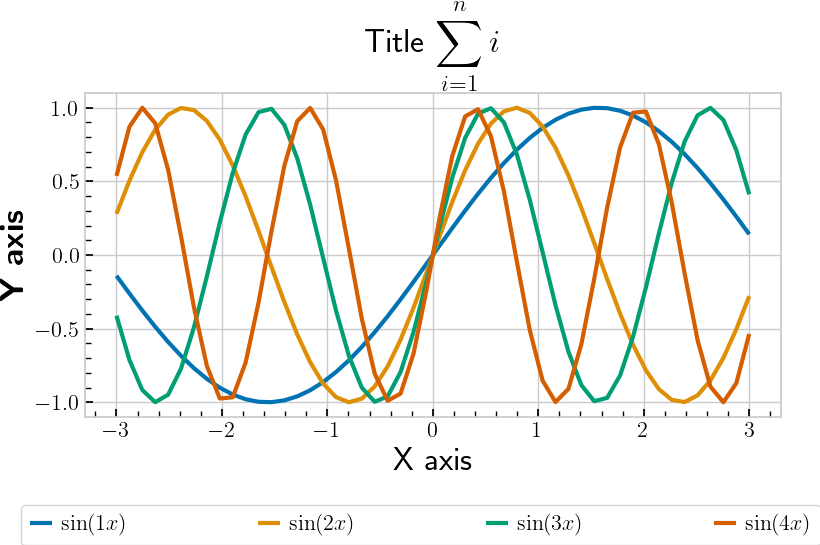

In [5]:
fig, ax = plt.subplots(dpi=100, figsize=(8, 4))  # use dpi to scale up your figure. See https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size
for i, y_ in enumerate(y):
    ax.plot(x, y_, label=rf"$\sin({coefs[i]}x)$")  # can combine latex with string interpolation
ax.set(
    ylabel=r"\textbf{Y axis}",  # can textbf
    xlabel=r"X axis",
)
ax.set_title(r"Title  $\displaystyle \sum_{i=1}^n i$", pad=30)  # Can do displaystyle math, but may need to add some space between title and Axes

# put legend outside plot
handles, labels = ax.get_legend_handles_labels()
lg = fig.legend(
    handles=handles, labels=labels,
    bbox_to_anchor=(0., -0.25, 1., 0.),  # (left, bottom, right, top)
    loc="lower center",
    ncol=len(labels),
    borderaxespad=0.,  # remove default spacing between legend and axes
    mode="expand",  # expand the legend to fix bbox_to_anchor
)

# Different seaborn context styles

Each context will scale the plot elements differently. See https://github.com/mwaskom/seaborn/blob/fc50d08cac8e99dd41452411412efbc69fc7908b/seaborn/rcmod.py#L338

<Figure size 3840x593.325 with 4 Axes>

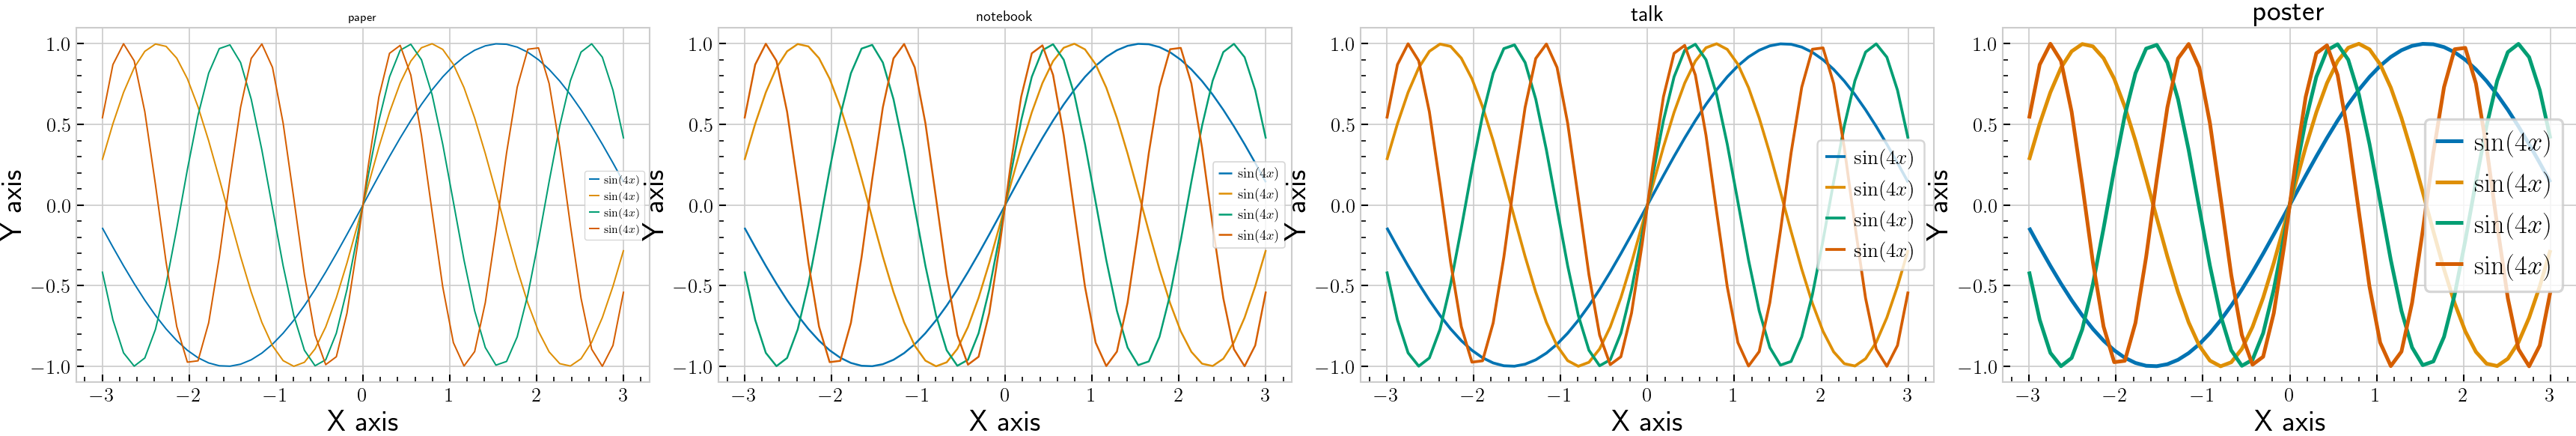

In [6]:
styles = ["paper", "notebook", "talk", "poster"]
ncols = len(styles)
fig, axes = make_subplots(ncols=ncols)


for style, ax in zip(styles, axes):
    with sns.plotting_context(style):
        # Note that usually the font_scale and lines.linewidth would also differ
        for y_ in y:
            ax.plot(x, y_, label=rf"$\sin({coefs[i]}x)$")
        ax.set(
            ylabel=r"Y axis",
            xlabel=r"X axis",
            title=style,
        )
        ax.legend()

# Overwritting rcParams using a seaborn `plotting_context`

<Figure size 3840x593.325 with 4 Axes>

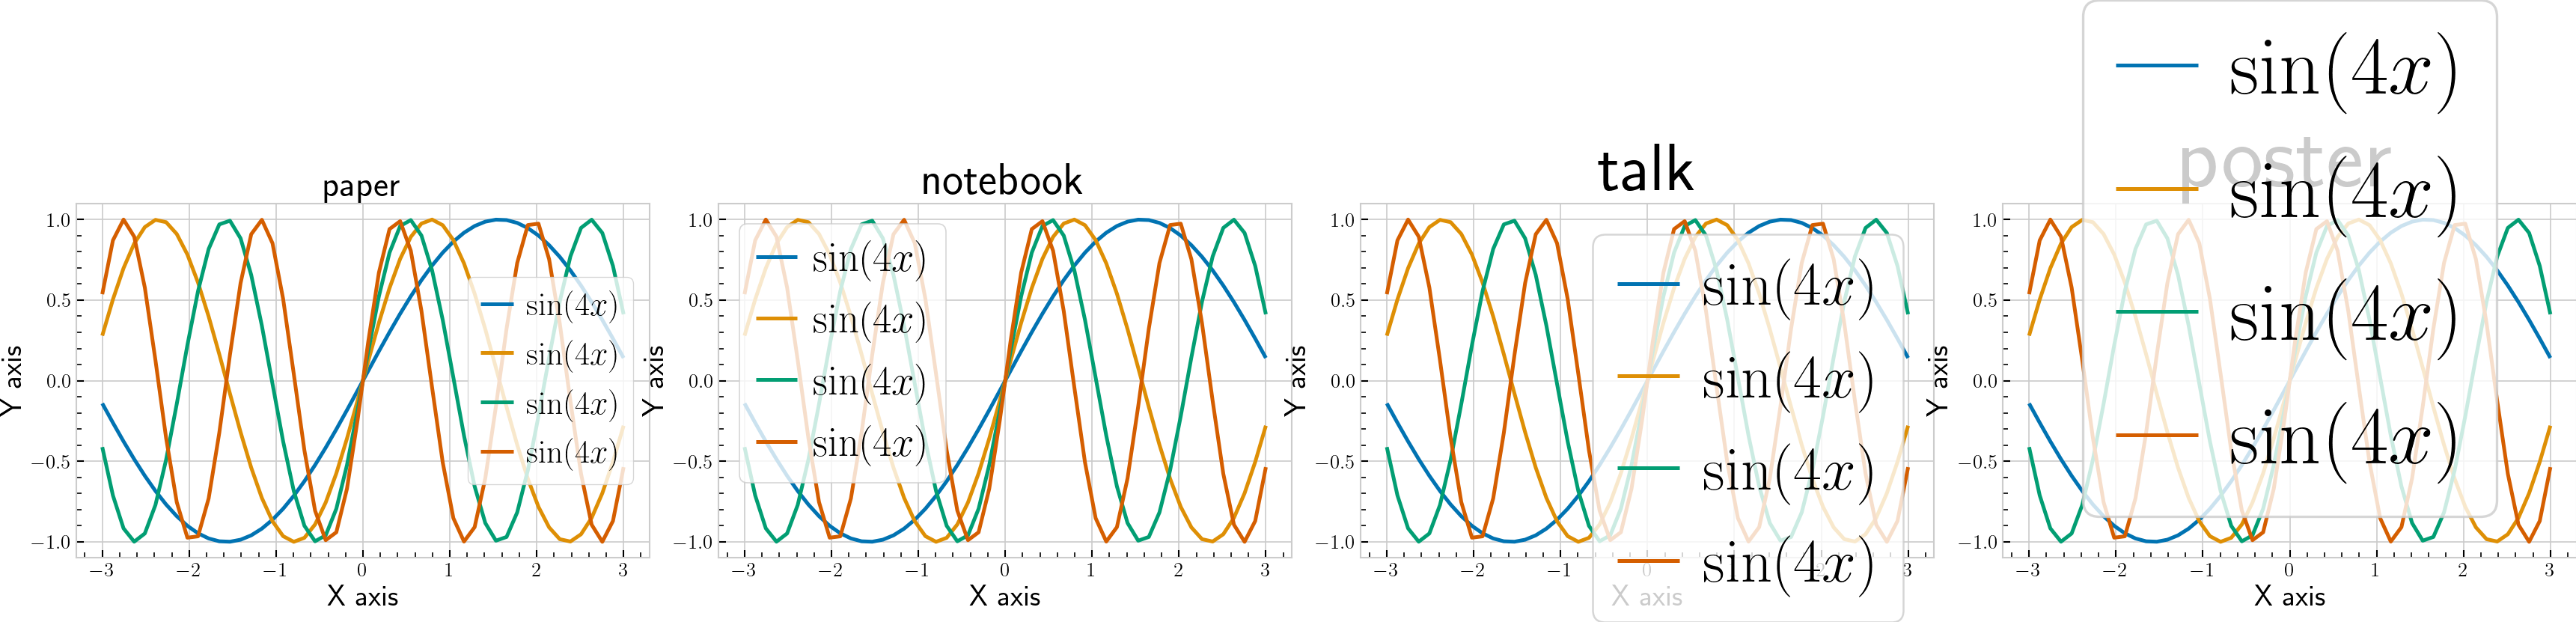

In [7]:
rc = {"lines.linewidth": 3}  # Overwrite seaborn context for linewidth
font_scale = 3.  # Scale up the seaborn context font settings

styles = ["paper", "notebook", "talk", "poster"]
ncols = len(styles)
fig, axes = make_subplots(ncols=ncols)

for style, ax in zip(styles, axes):
    with sns.plotting_context(style, font_scale=font_scale, rc=rc):
        # Note that usually the font_scale and lines.linewidth would also differ
        for y_ in y:
            ax.plot(x, y_, label=rf"$\sin({coefs[i]}x)$")
        ax.set(
            ylabel=r"Y axis",
            xlabel=r"X axis",
            title=style,
        )
        ax.legend()

# Shared legend below plot

<Figure size 1920x480 with 3 Axes>

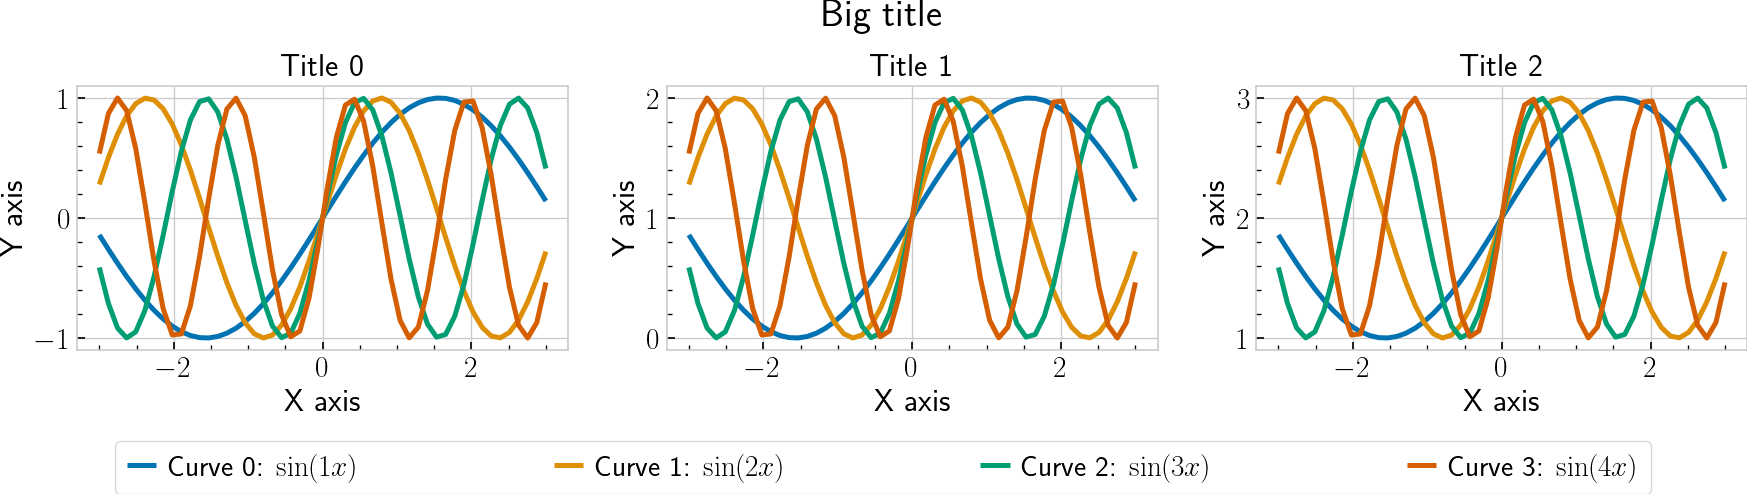

In [8]:
rc = {"lines.linewidth": 3}  # Overwrite seaborn context for linewidth
font_scale = 2.  # Scale up the seaborn context font settings

with sns.plotting_context("paper", font_scale=font_scale, rc=rc):
    ncols = 3
    height = 4
    width = (ncols + 1) * height
    fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
    for i, ax in enumerate(axes):
        for j, y_ in enumerate(y):
            ax.plot(x, y_ + i, label=rf"Curve {j}: $\sin({coefs[j]}x)$")
        ax.set(
            ylabel="Y axis",
            xlabel="X axis",
            title=f"Title {i}",
        )
    
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.subplots_adjust(bottom=0.25, top=0.8, wspace=0.2)
    lg = fig.legend(handles=handles, labels=labels,
               bbox_to_anchor=(0.1, -0.05, 0.8, 0.),  # (left, bottom, right, top)
               loc="lower center",
               ncol=len(labels),
               borderaxespad=0.,
               mode="expand",
    )
    st = fig.suptitle("Big title")

In [9]:
fig.savefig("three-shared-legend.pdf",
            bbox_inches="tight", # ensure that extra legend doesn't get cropped out
            #bbox_extra_artists=(lg, st), # may or may not also need this?
)

# Use a custom palette context

<Figure size 480x96 with 1 Axes>

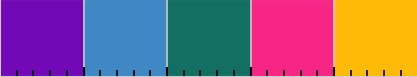

<Figure size 768x474.66 with 1 Axes>

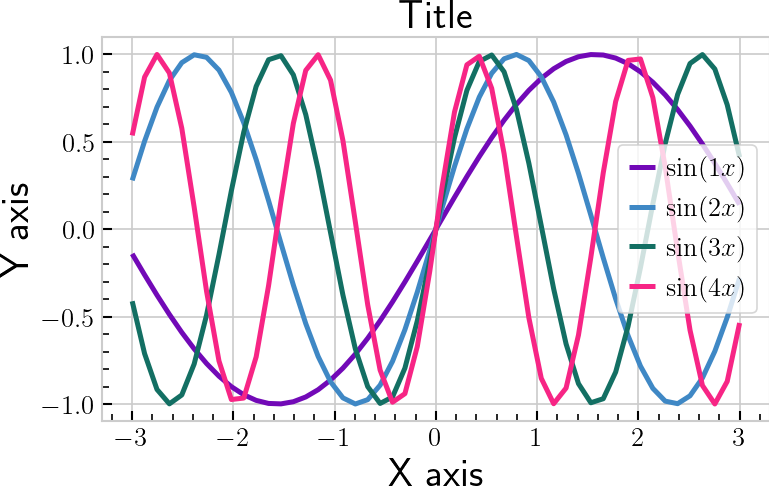

In [10]:
palette = ["#7209B7","#3F88C5","#136F63","#F72585","#FFBA08"]
sns.palplot(sns.color_palette(palette),size=0.8)


# Use sns.set_palette if you want to use it globally
with sns.color_palette(palette):
    fig, ax = plt.subplots()  # use dpi to scale up your figure. See https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size
    for i, y_ in enumerate(y):
        ax.plot(x, y_, label=rf"$\sin({coefs[i]}x)$")  # can combine latex with string interpolation
    ax.set(
        ylabel="Y axis",
        xlabel="X axis",
        title="Title",
    )
    ax.legend()

Try out [Color Brewer](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) for choosing palettes.
The palettes are chosen to be easy to interpret when used to represent ordered categories.
Also colorblind accessible.

# Use a cmap as a palette

<Figure size 960x96 with 1 Axes>

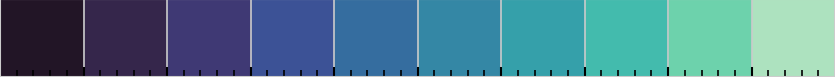

In [49]:
palette = sns.color_palette("mako", n_colors=10)
sns.palplot(palette,size=0.8)

<Figure size 576x96 with 1 Axes>

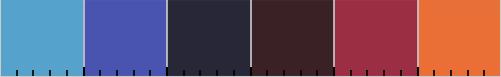

In [12]:
palette = sns.color_palette("icefire")
sns.palplot(palette,size=0.8)

# Some functions for constructing palettes

<Figure size 960x96 with 1 Axes>

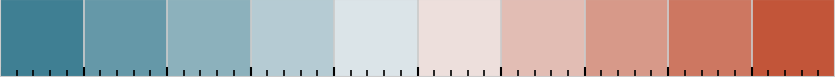

In [53]:
palette = sns.diverging_palette(220, 20, n=10)
sns.palplot(palette,size=0.8)

<Figure size 960x96 with 1 Axes>

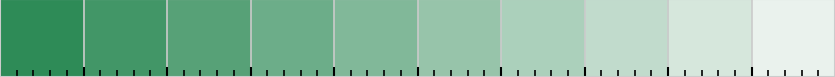

In [51]:
palette = sns.light_palette("seagreen", n_colors=10, reverse=True)  # try out `sns.choose_light_palette` widget
sns.palplot(palette,size=0.8)

<Figure size 576x96 with 1 Axes>

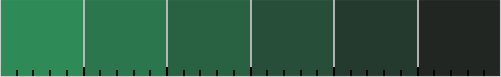

In [15]:
palette = sns.dark_palette("seagreen", reverse=True)  # try out `sns.choose_dark_palette` widget
sns.palplot(palette,size=0.8)

<Figure size 576x96 with 1 Axes>

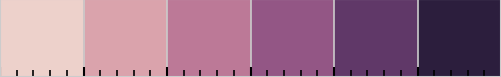

In [16]:
palette = sns.cubehelix_palette()  # try out `sns.choose_cubehelix_palette` widget
sns.palplot(palette,size=0.8)

# Some nice color palettes

<Figure size 864x96 with 1 Axes>

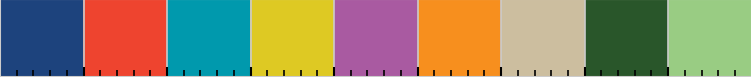

In [17]:
tianyi_palette = ['#1d437d', '#ee442f', '#0099ad', '#dec923', '#a95aa1', '#f78f1e', '#ccbe9f', '#29562a', '#99cc83']
sns.palplot(tianyi_palette, size=0.8)

<Figure size 960x96 with 1 Axes>

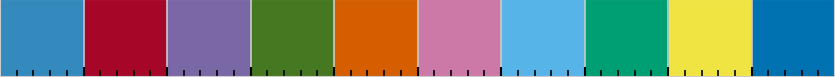

In [18]:
bmh_palette = ['#348ABD',
 '#A60628',
 '#7A68A6',
 '#467821',
 '#D55E00',
 '#CC79A7',
 '#56B4E9',
 '#009E73',
 '#F0E442',
 '#0072B2']
sns.palplot(bmh_palette, size=0.8)

<Figure size 960x120 with 1 Axes>

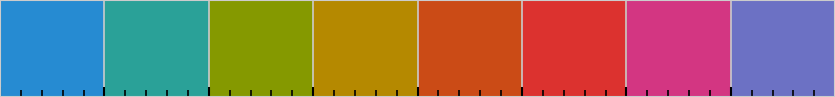

In [19]:
# solarized light
palette = ['#268BD2', '#2AA198', '#859900', '#B58900', '#CB4B16', '#DC322F', '#D33682', '#6C71C4']
sns.palplot(palette)

<Figure size 576x96 with 1 Axes>

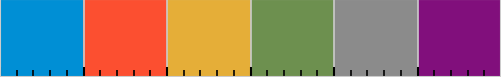

In [20]:
blue, red, yellow, green, gray, purple =  ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']
fivethirtyeight_palette = sns.color_palette([blue, red, yellow, green, gray, purple])
sns.palplot(fivethirtyeight_palette,size=0.8)

<Figure size 672x96 with 1 Axes>

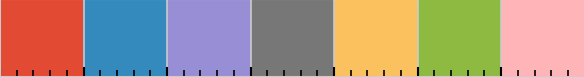

In [21]:
red, blue, purple, gray, yellow, green, pink = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']
ggplot_palette = sns.color_palette([red, blue, purple, gray, yellow, green, pink])
sns.palplot(ggplot_palette, size=0.8)

<Figure size 864x96 with 1 Axes>

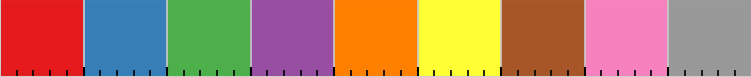

In [22]:
palette = sns.color_palette("Set1")
sns.palplot(palette,size=0.8)

<Figure size 768x96 with 1 Axes>

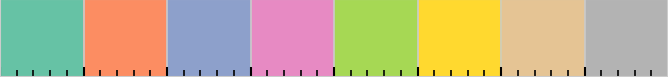

In [23]:
palette = sns.color_palette("Set2")
sns.palplot(palette,size=0.8)

<Figure size 1152x96 with 1 Axes>

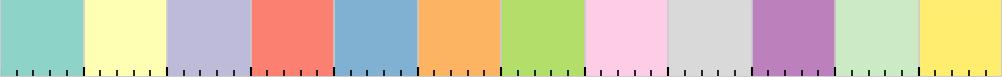

In [24]:
palette = sns.color_palette("Set3")
sns.palplot(palette,size=0.8)

<Figure size 960x96 with 1 Axes>

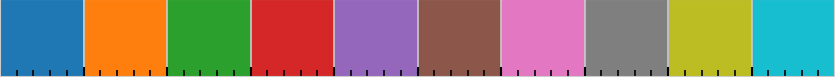

In [25]:
palette = sns.color_palette("tab10")  # tableau
sns.palplot(palette,size=0.8)

<Figure size 1920x96 with 1 Axes>

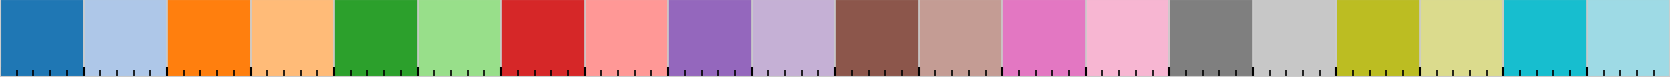

In [26]:
palette = sns.color_palette("tab20")
sns.palplot(palette,size=0.8)

<Figure size 1152x96 with 1 Axes>

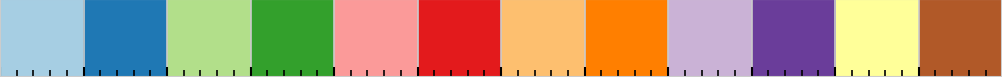

In [27]:
palette = sns.color_palette("Paired")
sns.palplot(palette,size=0.8)

<Figure size 576x96 with 1 Axes>

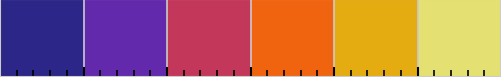

In [28]:
palette = sns.color_palette("CMRmap")
sns.palplot(palette,size=0.8)

<Figure size 768x96 with 1 Axes>

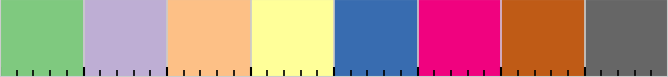

In [29]:
palette = sns.color_palette("Accent")
sns.palplot(palette,size=0.8)

<Figure size 960x96 with 1 Axes>

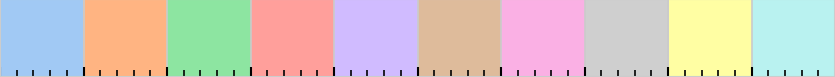

In [30]:
palette = sns.color_palette("pastel")
sns.palplot(palette,size=0.8)

<Figure size 960x96 with 1 Axes>

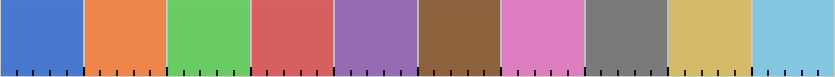

In [31]:
palette = sns.color_palette("muted")
sns.palplot(palette,size=0.8)

<Figure size 960x96 with 1 Axes>

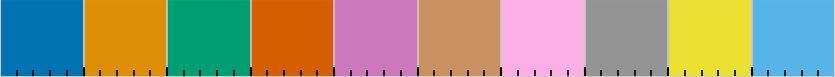

In [32]:
palette = sns.color_palette("colorblind")
sns.palplot(palette,size=0.8)

<Figure size 960x96 with 1 Axes>

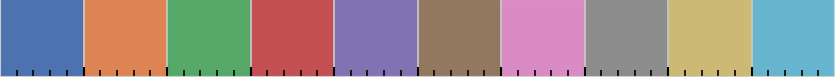

In [33]:
palette = sns.color_palette("deep")
sns.palplot(palette,size=0.8)

<Figure size 672x96 with 1 Axes>

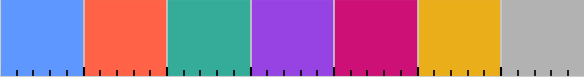

In [34]:
# From https://github.com/williamgilpin/degas/blob/master/degas/degas.py
# degas high contrast color scheme
blue, red, turquoise, purple, magenta, orange, gray  = [[0.372549, 0.596078, 1], 
                                                  [1.0, .3882, .2784], 
                                                  [0.20784314, 0.67843137, 0.6], 
                                                  [0.59607843, 0.25882353, 0.89019608],
                                                  [0.803922, 0.0627451, 0.462745], 
                                                  [0.917647, 0.682353, 0.105882],
                                                  [0.7, 0.7, 0.7]
                                                  ]
palette = [blue, red, turquoise, purple, magenta, orange, gray]
sns.palplot(palette, size=0.8)

<Figure size 768x96 with 1 Axes>

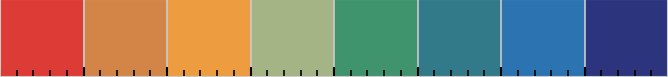

In [35]:
# From https://github.com/williamgilpin/degas/blob/master/degas/degas.py
pastel_rainbow = np.array([
    [221, 59,  53],
    [211, 132, 71],
    [237, 157, 63],
    [165, 180, 133],
    [63,  148, 109], 
    [50,  122, 137], 
    [44,  115, 178], 
    [43,  52,  124]
    ])/255.
palette = pastel_rainbow.tolist()
sns.palplot(palette, size=0.8)

<Figure size 120x120 with 1 Axes>

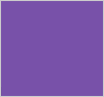

In [36]:
# From https://github.com/williamgilpin/degas/blob/master/degas/degas.py
royal_purple = np.array((120, 81, 169))/255.
sns.palplot([royal_purple])

# Useful functions for shading with the same color palette

In [37]:
# From  https://github.com/williamgilpin/degas/blob/master/degas/degas.py
def lighter(clr, f=1/3):
    """
    An implementation of Mathematica's Lighter[] 
    function for RGB colors
    clr : 3-tuple or list, an RGB color
    f : float, the fraction by which to brighten
    """
    gaps = [f*(1 - val) for val in clr]
    new_clr = [val + gap for gap, val in zip(gaps, clr)]
    return new_clr

def darker(clr, f=1/3):
    """
    An implementation of Mathematica's Darker[] 
    function for RGB colors
    clr : 3-tuple or list, an RGB color
    f : float, the fraction by which to brighten
    """
    gaps = [f*val for val in clr]
    new_clr = [val - gap for gap, val in zip(gaps, clr)]
    return new_clr

<Figure size 840x120 with 1 Axes>

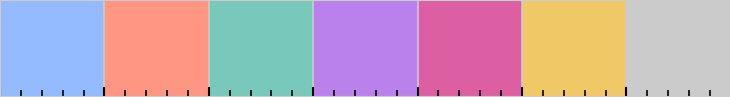

In [38]:
blue, red, turquoise, purple, magenta, orange, gray  = [[0.372549, 0.596078, 1], 
                                                  [1.0, .3882, .2784], 
                                                  [0.20784314, 0.67843137, 0.6], 
                                                  [0.59607843, 0.25882353, 0.89019608],
                                                  [0.803922, 0.0627451, 0.462745], 
                                                  [0.917647, 0.682353, 0.105882],
                                                  [0.7, 0.7, 0.7]
                                                  ]
palette = [blue, red, turquoise, purple, magenta, orange, gray]

sns.palplot([lighter(x) for x in palette])

<Figure size 840x120 with 1 Axes>

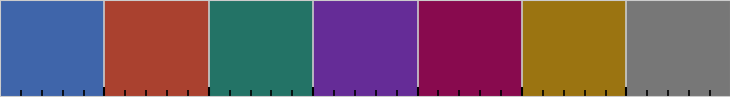

In [39]:
blue, red, turquoise, purple, magenta, orange, gray  = [[0.372549, 0.596078, 1], 
                                                  [1.0, .3882, .2784], 
                                                  [0.20784314, 0.67843137, 0.6], 
                                                  [0.59607843, 0.25882353, 0.89019608],
                                                  [0.803922, 0.0627451, 0.462745], 
                                                  [0.917647, 0.682353, 0.105882],
                                                  [0.7, 0.7, 0.7]
                                                  ]
palette = [blue, red, turquoise, purple, magenta, orange, gray]

sns.palplot([darker(x) for x in palette])

# Some nice cmaps

In [40]:
# From https://github.com/mwaskom/seaborn/blob/master/doc/tutorial/color_palettes.ipynb

# Add colormap display methods to matplotlib colormaps.
# These are forthcoming in matplotlib 3.4, but, the matplotlib display
# method includes the colormap name, which is redundant.
def _repr_png_(self):
    """Generate a PNG representation of the Colormap."""
    import io
    from PIL import Image
    import numpy as np
    IMAGE_SIZE = (400, 50)
    X = np.tile(np.linspace(0, 1, IMAGE_SIZE[0]), (IMAGE_SIZE[1], 1))
    pixels = self(X, bytes=True)
    png_bytes = io.BytesIO()
    Image.fromarray(pixels).save(png_bytes, format='png')
    return png_bytes.getvalue()
    
def _repr_html_(self):
    """Generate an HTML representation of the Colormap."""
    import base64
    png_bytes = self._repr_png_()
    png_base64 = base64.b64encode(png_bytes).decode('ascii')
    return ('<img ' +
            'alt="' + self.name + ' color map" ' +
            'title="' + self.name + '"' +
            'src="data:image/png;base64,' + png_base64 + '">')
    
import matplotlib as mpl
mpl.colors.Colormap._repr_png_ = _repr_png_
mpl.colors.Colormap._repr_html_ = _repr_html_

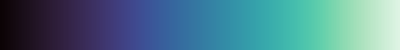

In [41]:
sns.color_palette("mako", as_cmap=True)

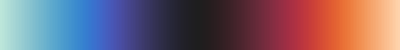

In [42]:
sns.color_palette("icefire", as_cmap=True)

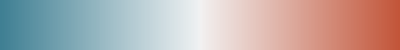

In [43]:
sns.diverging_palette(220, 20, as_cmap=True)

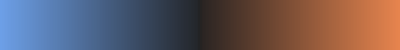

In [44]:
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

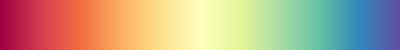

In [45]:
sns.color_palette("Spectral", as_cmap=True)